In [13]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import scipy.io as sio
import numpy as np
import scipy
import os
import warnings
import pandas as pd
import glob
import pickle
import matplotlib.pyplot as plt

warnings.simplefilter(action='ignore', category=FutureWarning)

In [15]:
pathes = glob.glob(os.path.join('..', 'data', 'processed_data','*'))
frames = list()

for path in pathes:
    file_path =os.path.join(path, 'all_data.pkl')
    frames.append(pd.read_pickle(file_path))

ripples = pd.concat(frames, ignore_index=True)
length = [len(frame) for frame in frames]

524.0


<IPython.core.display.Javascript object>


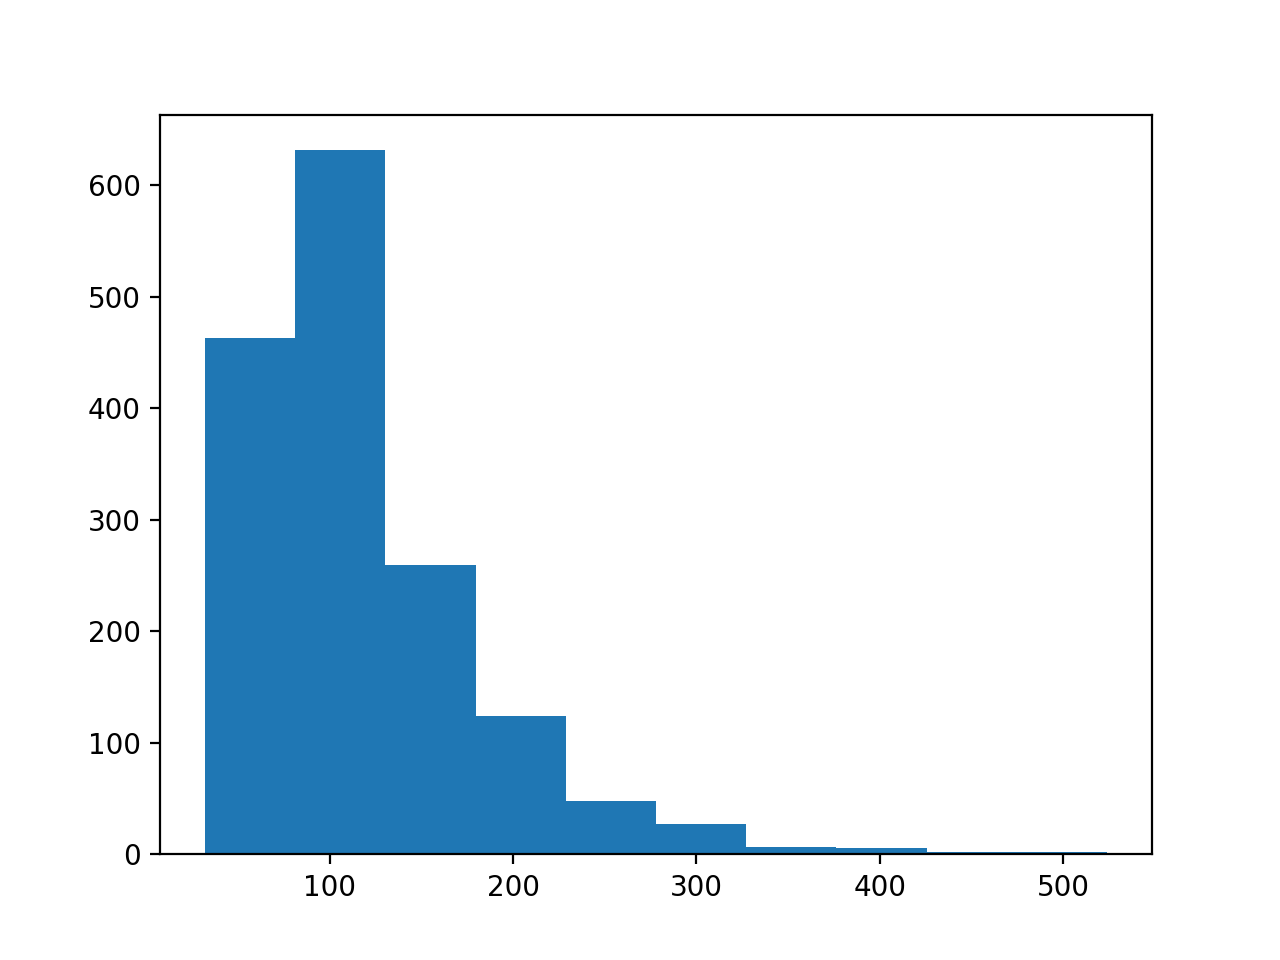

In [16]:
max_duration = ripples.duration_index.max()

print(max_duration)
ripple_length = 550

plt.figure()
plt.hist(ripples.duration_index)
plt.show()

In [17]:
#Centering

ripples['lfp'] = ripples.apply(lambda row: row['lfp']-row['lfp'].mean(), axis=1)


#Zero padding

# ripples['lfp'] = ripples.apply(lambda row: np.pad(row['lfp'], ((0,int(max_duration-row['lfp'].shape[0])), (0,0)), 'constant', constant_values=0), axis=1)

<IPython.core.display.Javascript object>


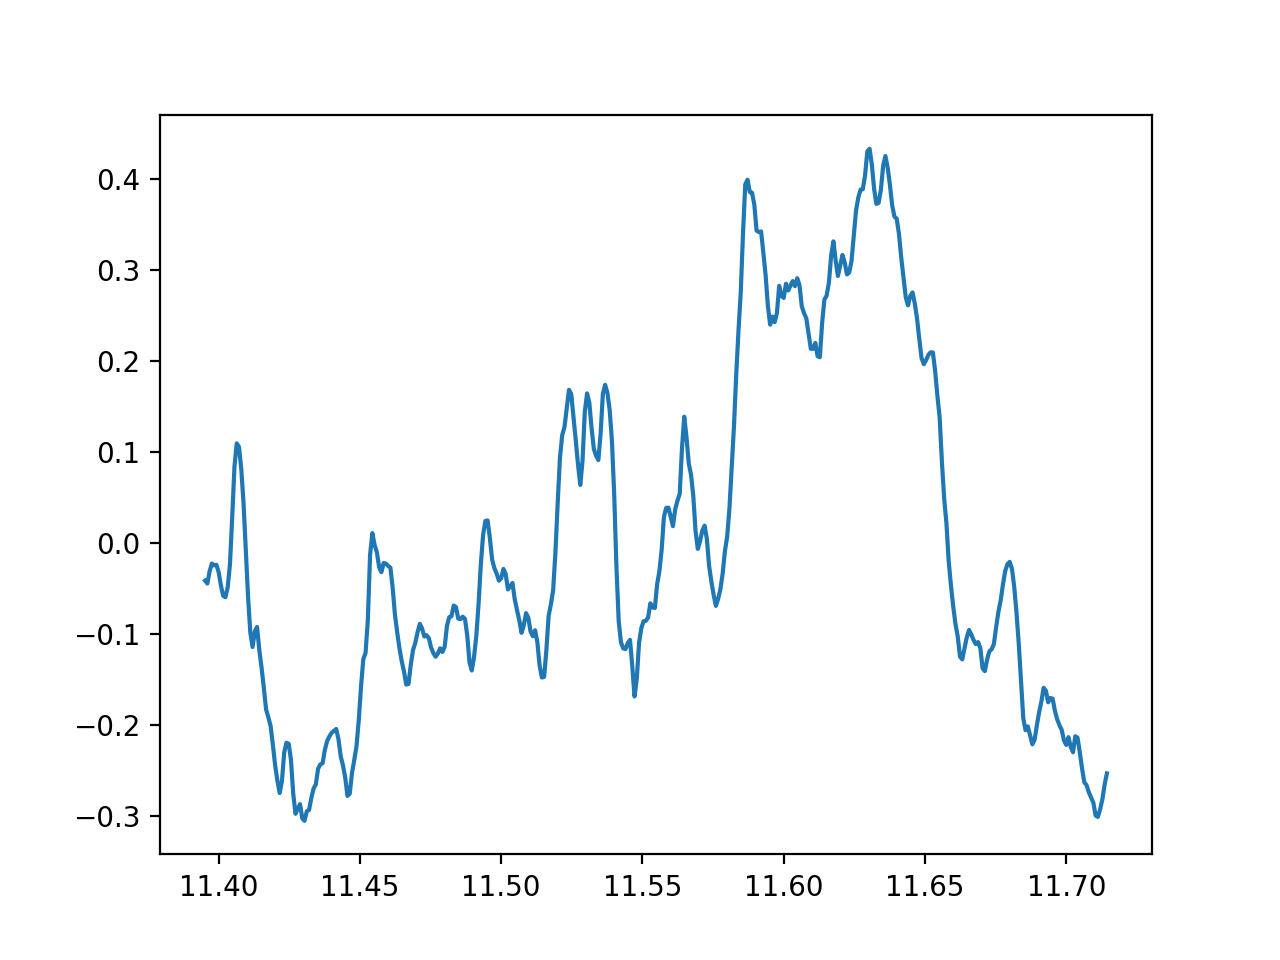

[]

In [26]:
i=5

plt.figure()
plt.plot(ripples.loc[i,'time'], ripples.loc[i,'lfp'].flatten())
plt.axvline(x=ripples.loc[i,'center'])
plt.plot()

In [19]:
X = np.zeros((len(ripples), int(max_duration), 1))
y = np.zeros((len(ripples)))

In [20]:
lfp = np.array(ripples.lfp)
labels = np.array(ripples.labels)

for i in range(len(lfp)):
    duration = lfp[i].shape[0]
    X[i,:duration,:] = lfp[i][:duration,:]
    y[i] = labels[i]

In [21]:
directory = os.path.join('..', 'data', 'final_data')

if not os.path.exists(directory):
    os.makedirs(directory)

np.save(os.path.join(directory, 'X_train.npy'), X[:-length[-1],:, :])
np.save(os.path.join(directory, 'y_train.npy'), y[:-length[-1]])

np.save(os.path.join(directory, 'X_test.npy'), X[length[-1]:,:, :])
np.save(os.path.join(directory, 'y_test.npy'), y[length[-1]:])

np.save(os.path.join(directory, 'X.npy'), X)
np.save(os.path.join(directory, 'y.npy'), y)

In [22]:
X = np.zeros((len(ripples), int(max_duration), 1))

In [23]:
X.shape

(1569, 524, 1)

In [24]:
ripples.loc[5,'lfp'].shape

(400, 1)